Exploratory Data Analysis


In [15]:
# Import Required Libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Filepath to the dataset
fakereviews_filepath = "Data/fake reviews dataset.csv"

# Load the dataset
reviews_data = pd.read_csv(fakereviews_filepath)

In [16]:
# Display basic information abou tthe dataset
print(reviews_data.head())
print(reviews_data.info())
print(reviews_data.describe())

             category  rating label  \
0  Home_and_Kitchen_5       5    CG   
1  Home_and_Kitchen_5       5    CG   
2  Home_and_Kitchen_5       5    CG   
3  Home_and_Kitchen_5       1    CG   
4  Home_and_Kitchen_5       5    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None
             rating
count  40432.000000
mean

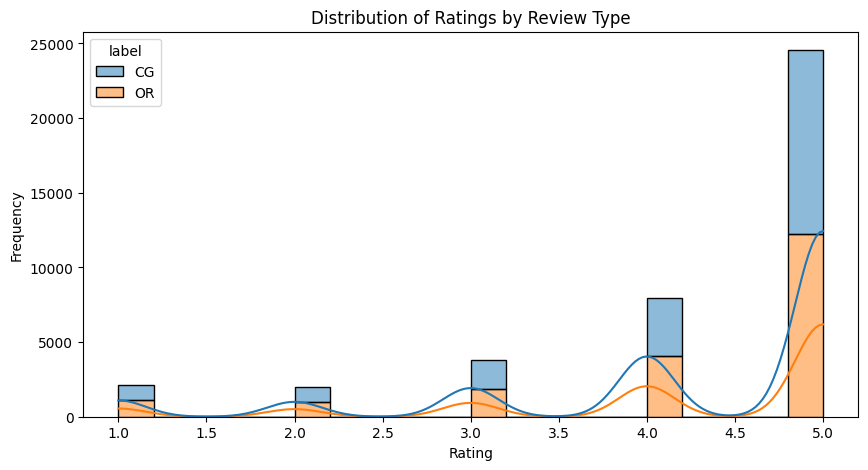

In [17]:
# Visualize the Distribution of Review Labels and Ratings
# Dstirbution of ratings, separated by label
plt.figure(figsize=(10,5))
sns.histplot(data=reviews_data, x='rating', hue='label', bins=20, kde=True, multiple="stack")
plt.title("Distribution of Ratings by Review Type")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


-CG is heavily skewed toward 5 stars

-Fake reviews are disproportionately positive (or negative, in some cases) to sway consumer opinion

In [18]:
# Test Cleaning & Preprocessing
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags, if any
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and non-letter characters
    return text

# Apply text cleaning to the 'text' column
reviews_data['cleaned_text'] = reviews_data['text_'].apply(clean_text)

# Check the result of cleaning
print(reviews_data[['text_', 'cleaned_text']].head())

                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                        cleaned_text  
0  love this  well made sturdy and very comfortab...  
1  love it a great upgrade from the original  ive...  
2  this pillow saved my back i love the look and ...  
3  missing information on how to use it but it is...  
4  very nice set good quality we have had the set...  


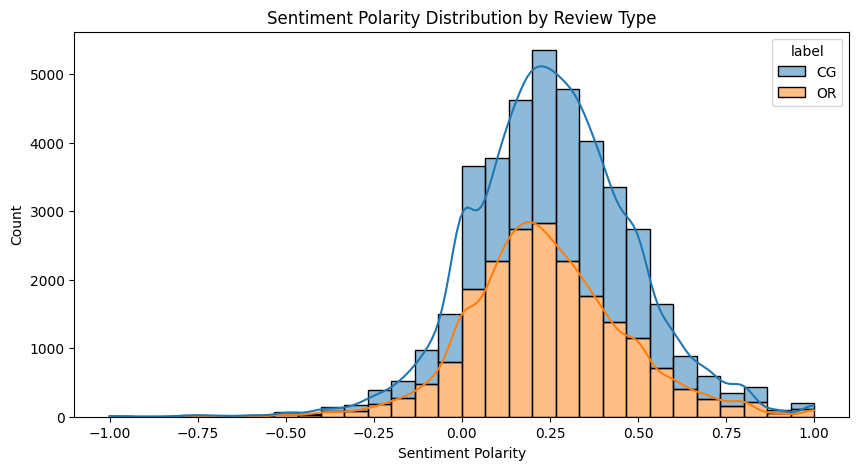

In [19]:
# Sentiment Analysis Using TextBlob
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis on the cleaned text
reviews_data['sentiment'] = reviews_data['cleaned_text'].apply(get_sentiment)

# Visualize sentiment distribution by review label
plt.figure(figsize=(10, 5))
sns.histplot(data=reviews_data, x='sentiment', hue='label', bins=30, kde=True, multiple="stack")
plt.title("Sentiment Polarity Distribution by Review Type")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Count")
plt.show()


-CG's distribution is peaked around a certain value(around 0.2-0.3) and OR is slightly broader, which indicates
fake reviews might use more formulaic or "safe" positive language. 

-Need more statistical testing (like Mann-Whitney U test or Kolmogorov-Smirnov test)

- -1.0 to -0.75 very negative
- -0.75 to -0.25 somewhat negative
- -0.25 to 0.25 neutral
- 0.25 to 0.75 somewhat positive
- 0.75 to 1.0 very positive

Mann-Whitney U test: Used to check if one group tends to have larger/smaller values than the other (without assuming normal distribution)
- Compare review lengths, sentiment polarity, and rating distributions

Kolmogorov-Smirnov (KS) test: Used to compare overall shape and spread of distribution, not just medians
- Compare full distribution of sentiment polarity, rating distribution, and check if review length distributions are truly different beyond just median values


In [20]:
# Compute sentiment stats by label
cg_reviews = reviews_data[reviews_data['label'] == 'CG']
or_reviews = reviews_data[reviews_data['label'] == 'OR']

print(f"CG (Fake) Mean Sentiment: {cg_reviews['sentiment'].mean():.3f}")
print(f"CG (Fake) Sentiment Std Deviation: {cg_reviews['sentiment'].std():.3f}")

print(f"OR (Real) Mean Sentiment: {or_reviews['sentiment'].mean():.3f}")
print(f"OR (Real) Sentiment Std Deviation: {or_reviews['sentiment'].std():.3f}")


CG (Fake) Mean Sentiment: 0.274
CG (Fake) Sentiment Std Deviation: 0.231
OR (Real) Mean Sentiment: 0.242
OR (Real) Sentiment Std Deviation: 0.225


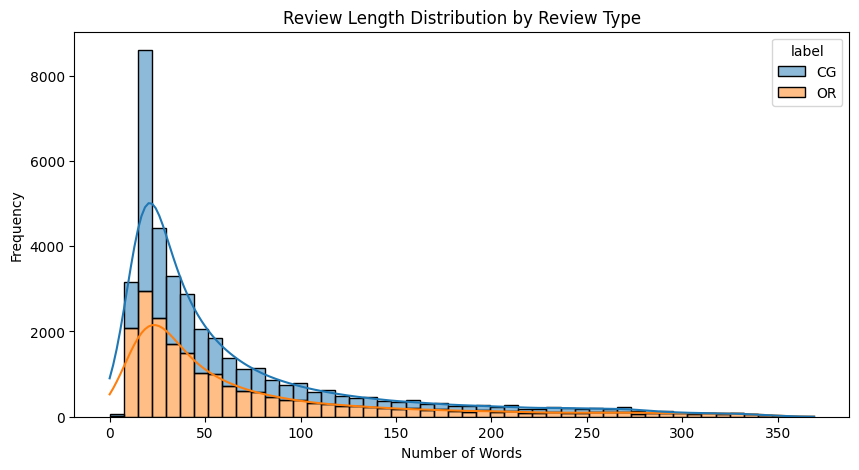

In [21]:
# Calculate review lengths (number of words)
reviews_data['review_length'] = reviews_data['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data=reviews_data, x='review_length', hue='label', bins=50, kde=True, multiple="stack")
plt.title("Review Length Distribution by Review Type")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


CG (Fake) Reviews
- Shows a large spike at shorter lengths (under ~40 words)

OR (Real) Reviews
- Distribution is skewed towards shorter lengths, but with a slightly borader spread than CG


In [22]:
# Find mode (most common review length) for each label
cg_mode = reviews_data[reviews_data['label'] == 'CG']['review_length'].mode().iloc[0]
or_mode = reviews_data[reviews_data['label'] == 'OR']['review_length'].mode().iloc[0]

print(f"Most frequent review length (CG - Fake): {cg_mode} words")
print(f"Most frequent review length (OR - Real): {or_mode} words")


Most frequent review length (CG - Fake): 17 words
Most frequent review length (OR - Real): 21 words


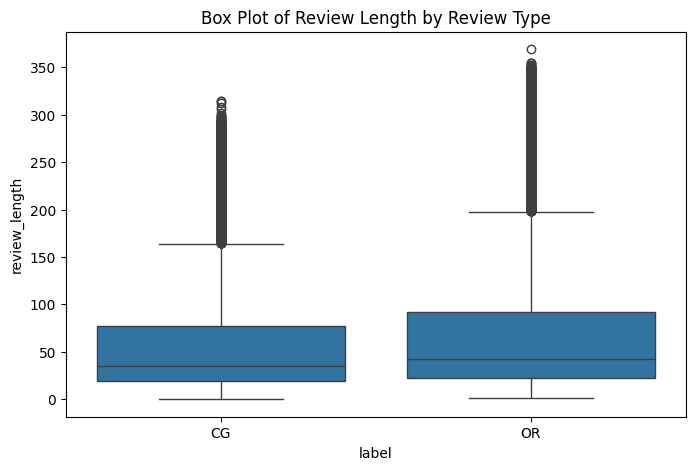

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=reviews_data, x='label', y='review_length')
plt.title("Box Plot of Review Length by Review Type")
plt.show()


CG (Fake) Reviews
- Median length is lower than OR

OR (Real) Reviews
- The median is higher than CG, and the whiskers suggest more variety in length


- "Review length" can be a valuable feature in detecting fake reviews. Exremely short(or extremely long) reviews might raise suspicion
- Real reviews tend to vary more in length. 

In [24]:
# Median review length for each label
cg_median = reviews_data[reviews_data['label'] == 'CG']['review_length'].median()
or_median = reviews_data[reviews_data['label'] == 'OR']['review_length'].median()

print(f"Median review length (CG - Fake): {cg_median} words")
print(f"Median review length (OR - Real): {or_median} words")


Median review length (CG - Fake): 35.0 words
Median review length (OR - Real): 42.0 words


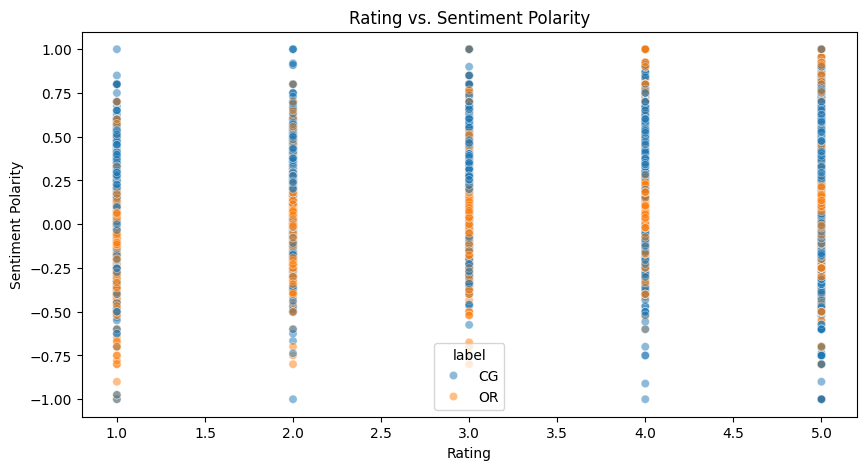

In [25]:
# Rating-Sentiment Correlation
plt.figure(figsize=(10,5))
sns.scatterplot(data=reviews_data, x='rating', y='sentiment', hue='label', alpha=0.5)
plt.title("Rating vs. Sentiment Polarity")
plt.xlabel("Rating")
plt.ylabel("Sentiment Polarity")
plt.show()


CG Reviews
- The text might not match the rating as strongly-typical if the text is auto-generated

OR Reviews
- Ratings and sentiments often line up more consistently

In [ ]:
# Calculate Pearson correlation for each label 
from scipy.stats import pearsonr

# Filter CG vs. OR
cg_data = reviews_data[reviews_data['label'] == 'CG']
or_data = reviews_data[reviews_data['label'] == 'OR']

cg_corr, cg_pval = pearsonr(cg_data['rating'], cg_data['sentiment'])
or_corr, or_pval = pearsonr(or_data['rating'], or_data['sentiment'])

print(f"CG correlation: {cg_corr:.3f} (p-value={cg_pval:.3e})")
print(f"OR correlation: {or_corr:.3f} (p-value={or_pval:.3e})")


CG correlation: 0.174 (p-value=1.049e-136)
OR correlation: 0.375 (p-value=0.000e+00)


CG (Fake) Correlation = 0.174
- A weak positive correlation. Despite being statistically significant, the effect size is small. 
- The textual sentiment only partially aligns with the numeric rating

OR (Real) Correltion = 0.375
- A moderate positive correlation. 
- Real users who leave higher ratings also tend to write text with a higher positive sentiment

Overall Takeaways

1. EDA Highlights
- Review Length: CG reviews are often shorter but can be artificially padded, while OR reviews vary more naturally
- Rating Distribution: CG tends to cluster around extremes (especially 5 stars), whereas OR is more diverse
- Sentiment-Rating Alignment: Real reviews have a stronger match between rating and textual sentiment, while fake reviews show
a weaker correlation
